In [14]:
#preprocessing
import numpy as np
import random

#plotting
import matplotlib.pyplot as plt

#connectivity measures
import nilearn.connectome as nic


## Loading Data

In [2]:
%run loading_data.ipynb

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



In [7]:
sub_data, sub_ids = load_txt()
handedness = get_handedness(sub_ids)

Subject Data Loaded
restricted_data loaded


In [3]:
atlas = load_atlas()
atlas_coords = get_atlas_coords(atlas)

/tmp/ipykernel_414/1030149754.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas = image.threshold_img(atlas, "99.5%")


atlas has shape ['x', 'y', 'z', 'region'] = (91, 109, 91, 100)


In [5]:
#loading labels
def get_labels(atlas_coords):
    brain_region = []
    for atlas_coord in atlas_coords:
        region = read_atlas_peak("harvard_oxford", atlas_coord)
        print(region)
        brain_region += [region]  
    #select the correct region with largest probability given from the library
    brain_region = [
        max(inner_list, key=lambda x: x[0])[-1] if inner_list else None for inner_list in brain_region
        ]
    return np.array(brain_region)
labels = get_labels(atlas_coords)

[[np.float64(62.0), 'Right_Occipital_Pole']]
[[np.float64(50.0), 'Right_Lateral_Occipital_Cortex_superior_division'], [np.float64(30.0), 'Right_Angular_Gyrus']]
[[np.float64(56.0), 'Right_Lateral_Occipital_Cortex_inferior_division'], [np.float64(14.0), 'Right_Occipital_Pole']]
[[np.float64(54.0), 'Left_Cuneal_Cortex'], [np.float64(9.0), 'Right_Cuneal_Cortex']]
[[np.float64(81.0), 'Left_Supramarginal_Gyrus_anterior_division'], [np.float64(6.0), 'Left_Supramarginal_Gyrus_posterior_division']]
[[np.float64(85.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(66.0), 'Right_Supramarginal_Gyrus_posterior_division'], [np.float64(14.0), 'Right_Angular_Gyrus']]
[[np.float64(68.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(72.0), 'Left_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(49.0), 'Right_Precuneous_Cortex'], [np.float64(30.0), 'Left_Precuneous_Cortex']]
[[np.float64(47.0), 'Right_Occipital_Fusiform_Gyrus'], [np.float64(26.0), 'Right

In [9]:
labels

array(['Right_Occipital_Pole',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Right_Lateral_Occipital_Cortex_inferior_division',
       'Left_Cuneal_Cortex', 'Left_Supramarginal_Gyrus_anterior_division',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Right_Supramarginal_Gyrus_posterior_division',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Right_Precuneous_Cortex', 'Right_Occipital_Fusiform_Gyrus',
       'Left_Angular_Gyrus',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Left_Precuneous_Cortex', 'Right_Occipital_Pole',
       'Right_Intracalcarine_Cortex',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Left_Occipital_Pole',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Left_Postcentral_Gyrus', 'Left_Superior_Frontal_Gyrus',
       'Right_Supramargina

### Correlation Matrices

In [ ]:
#create all correlation matrices
matrices = []
for i in range(len(sub_data)):
    matrices.append(np.corrcoef(sub_data[i].T))
matrices = np.array(matrices)

In [8]:
#Correlation matrix
correlation_measure = nic.ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform(sub_data)

In [12]:
correlation_matrix[0]

array([[ 1.        ,  0.06406065,  0.49713855, ...,  0.0145007 ,
        -0.03186874,  0.09747283],
       [ 0.06406065,  1.        , -0.05843183, ..., -0.03494625,
         0.10321584,  0.16452596],
       [ 0.49713855, -0.05843183,  1.        , ..., -0.04135172,
        -0.09471276, -0.06443809],
       ...,
       [ 0.0145007 , -0.03494625, -0.04135172, ...,  1.        ,
         0.07830525,  0.08003848],
       [-0.03186874,  0.10321584, -0.09471276, ...,  0.07830525,
         1.        ,  0.1082698 ],
       [ 0.09747283,  0.16452596, -0.06443809, ...,  0.08003848,
         0.1082698 ,  1.        ]], shape=(100, 100))

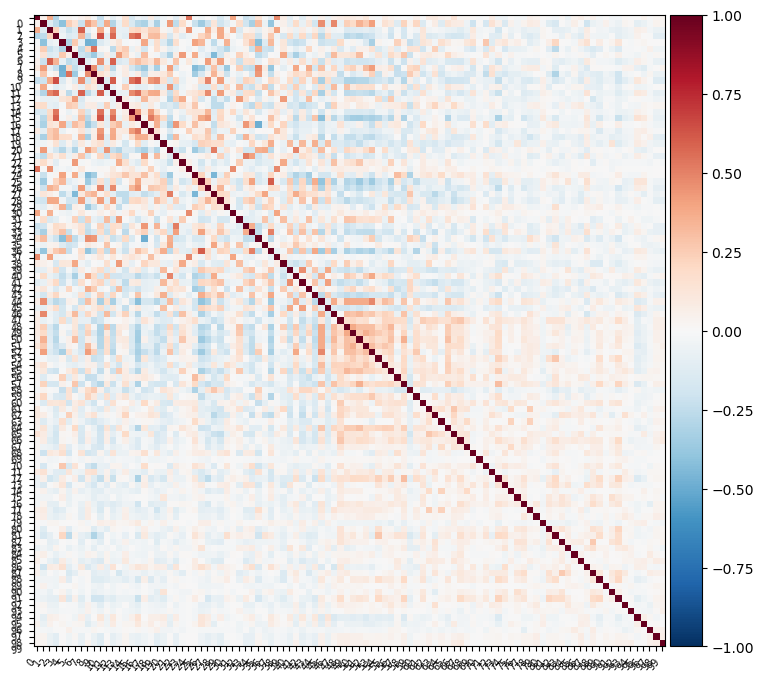

In [21]:
fig, ax = plt.subplots(figsize=(7, 7),
                       layout='constrained')
plotting.plot_matrix(
    correlation_measure.mean_, labels=range(0,100), colorbar=True, vmax=1, vmin=-1, figure=fig
)

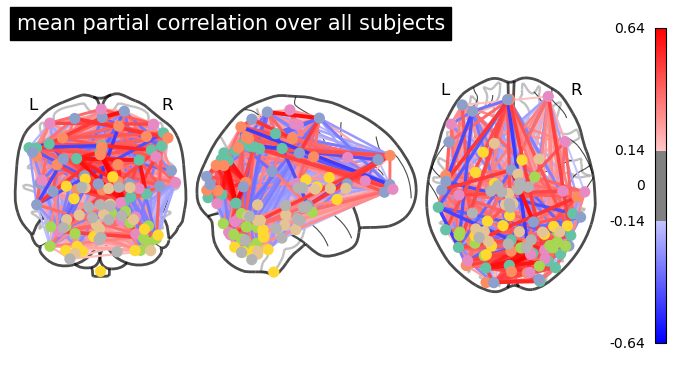

In [33]:
plotting.plot_connectome(
    correlation_measure.mean_,
    atlas_coords,
    title="mean partial correlation over all subjects",
    edge_threshold="80%", colorbar=True
)

#### Partial Correlation

Define what are partial Correlations?
- 

In [27]:
p_correlation_measure = nic.ConnectivityMeasure(kind='partial correlation')
p_correlation_matrix = p_correlation_measure.fit_transform(sub_data)

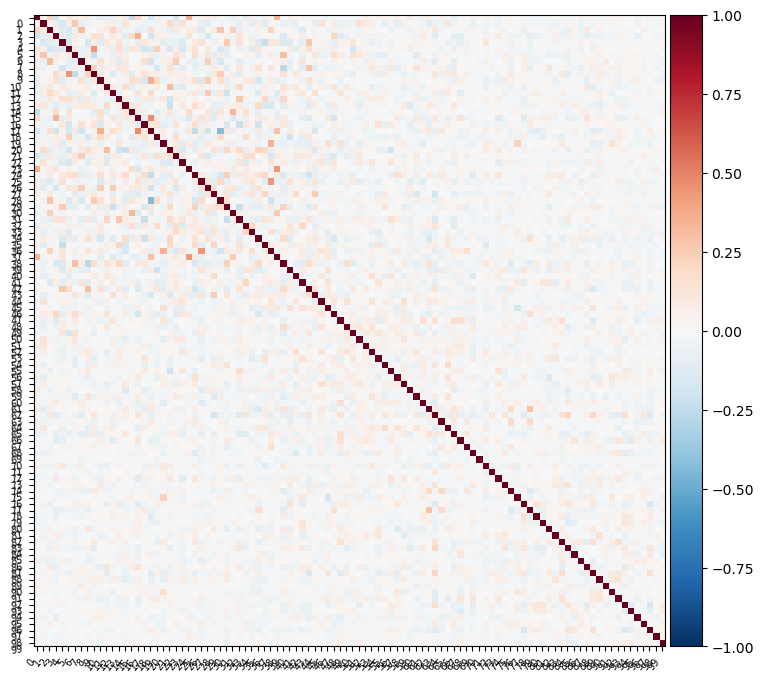

In [29]:
fig, ax = plt.subplots(figsize=(7, 7),
                       layout='constrained')
plotting.plot_matrix(
    p_correlation_matrix[1], labels=range(0,100), colorbar=True, vmax=1, vmin=-1, figure=fig
)

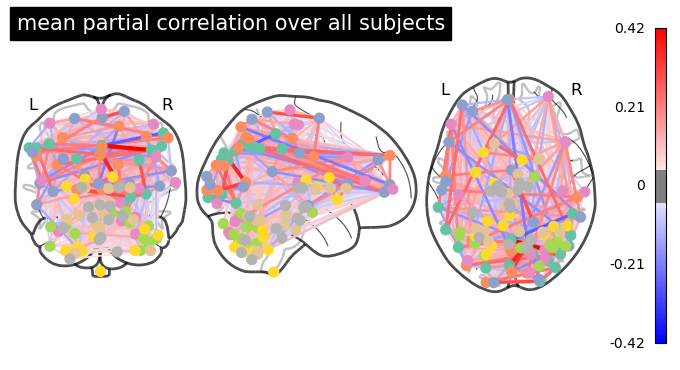

In [34]:
plotting.plot_connectome(
    p_correlation_measure.mean_,
    atlas_coords,
    title="mean partial correlation over all subjects",
    edge_threshold="80%", colorbar=True
)

## Seed Correlations w/ ROIs

- [Check this link](https://nilearn.github.io/dev/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html)
- Use `['Left_Postcentral_Gyrus', 'Right_Postcentral_Gyrus',
       'Right_Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)']`
  - Located at the following indices `{37, 40, 42}`

## Graphical LASSO and inverse covariance
- [Check this link](https://nilearn.github.io/dev/connectivity/connectome_extraction.html)

## Maybe Try Building Motor Networks and looking for differences
- [Check this out](https://bdpedigo.github.io/networks-course/representing_networks.html)

## Assess interhemispheric connects and hemispheric asymetry

## Regional Homogeneity